In [1]:
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
%matplotlib inline

In [13]:
df=pd.DataFrame()
filenames = glob("DataGovSG/*_rainfall.csv")
for filename in filenames:
    other_df = pd.read_csv(filename)
    other_df = other_df.rename(columns={"value": "rainfall"})
    other_df["timestamp_sgt"] = other_df["timestamp_sgt"].astype("datetime64[ns]")
    df = df.append(other_df,ignore_index=True)
another_df = df.set_index("station_id").sort_index()

In [14]:
locations = pd.read_csv("StationLocations.csv")
locations=locations.rename(columns={"Lon (d)":"longitude","Lat (d)":"latitude"})
#locations

In [15]:
nnon_zero = another_df[another_df["rainfall"]>0]
nnon_zero = nnon_zero.sort_values("timestamp_sgt",ascending=True).reset_index().set_index("timestamp_sgt",drop=False)
times = nnon_zero.index
nnon_zero = nnon_zero.set_index([times.year,times.month,times.day,times.hour])
nnon_zero.index.names = ["year","month","day","hour"]
#non_zero
number = nnon_zero.groupby(["year","month","day","hour"])["station_id"].nunique()
number=number[number==1]
one_station = list(number.index)
nnon_zero=nnon_zero.drop(one_station)
nnon_zero
all_stations = nnon_zero["station_id"].values

In [16]:
nnon_zero = nnon_zero.groupby(["year","month","day","hour","station_id"]).sum()
nnon_zero.reset_index(inplace=True)
nnon_zero.set_index(["year","month","day","hour"],inplace=True)
#nnon_zero

In [17]:
non_zero = nnon_zero.set_index("station_id",append=True)
non_zero

rainfall
year month day hour station_id          
2016 12    3   1    S06              0.8
                    S07              2.2
                    S102             0.4
                    S110             2.2
                    S113             1.0
                    S118             1.8
                    S119             0.8
                    S123             0.4
                    S29              0.2
                    S36              1.2
                    S43              2.0
                    S55              1.6
                    S61              1.4
                    S71              0.2
                    S78              3.2
                    S79              0.4
                    S81              1.2
                    S84              0.4
                    S88              1.4
                    S90              0.2
                    S94              0.8
                    S96              2.2
               2    S106             0.8
                    S117             0.2
                    S29              1.0
                    S77              0.2
                    S94              1.2
                    S96              0.2
               4    S102             0.8
                    S106             0.2
...                                  ...
2017 4     29  6    S92              1.2
               7    S116             0.2
                    S117             0.2
                    S119             0.6
                    S123             0.2
                    S33              1.0
                    S35              0.6
                    S43              0.2
                    S63              0.2
                    S71              0.2
                    S77              1.0
                    S79              1.0
                    S88              0.2
               9    S115             3.2
                    S117             0.4
                    S92              0.2
               10   S115             1.4
                    S116             3.0
                    S117             0.2
                    S63              0.2
                    S92              0.4
               12   S108             0.2
                    S92              0.2
               17   S55              0.8
                    S81              6.4
                    S900             0.2
           30  19   S100            24.0
                    S104             4.0
                    S112            34.8
                    S66             27.8

[16612 rows x 1 columns]

In [18]:
non_zero = non_zero.unstack(level=-1)
non_zero

rainfall                                                 \
station_id               S06   S07   S08  S100  S101  S102 S104  S106  S107   
year month day hour                                                           
2016 12    3   1         0.8   2.2   NaN   NaN   NaN   0.4  NaN   NaN   NaN   
               2         NaN   NaN   NaN   NaN   NaN   NaN  NaN   0.8   NaN   
               4         NaN   NaN   NaN   NaN   NaN   0.8  NaN   0.2   NaN   
               5         3.0   4.4   1.4   NaN   NaN   3.4  NaN   0.2   NaN   
               6         4.2   0.8   1.0   NaN   0.2   0.2  NaN   0.4   NaN   
               7         NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
           4   3         NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               21        NaN   4.2   0.6   NaN   NaN   NaN  NaN   NaN   NaN   
               22        1.0   0.6   0.8   NaN   NaN   NaN  NaN   NaN   5.8   
               23        NaN   NaN   NaN   NaN   NaN   NaN  NaN   0.2   NaN   
           5   5         NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               6         NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               21        NaN   NaN   NaN   NaN   1.6   4.8  NaN   NaN   NaN   
               22        3.0   3.8  10.8  14.0  15.4   4.4  8.2   2.2   0.8   
               23        1.4   1.8   1.6   1.6   1.6   0.4  2.0   0.6   0.6   
           6   0         0.2   0.4   0.4   0.2   0.2   0.2  NaN   0.2   0.2   
               1         0.2   0.2   NaN   NaN   NaN   NaN  0.2   0.4   NaN   
               2         NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               3         NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               4         NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               6         NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               9         NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   0.2   
               14        1.8   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               16        NaN   NaN   NaN   NaN   NaN   NaN  NaN   0.4   NaN   
               17       21.0   NaN   NaN   NaN   NaN   NaN  NaN  11.8   4.4   
               18        NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
           7   9         NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               16        NaN   NaN   NaN   NaN   NaN   NaN  NaN  11.0   NaN   
               17        NaN   NaN   NaN   NaN   NaN   NaN  1.4   9.0  10.8   
               18        0.2   NaN   NaN   NaN   NaN   NaN  NaN   3.6   0.2   
...                      ...   ...   ...   ...   ...   ...  ...   ...   ...   
2017 4     25  15        NaN   NaN   0.2   NaN   NaN   NaN  NaN   NaN   NaN   
               16        NaN   NaN   0.2   NaN   NaN   NaN  NaN   0.2   NaN   
               17        NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               18        NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
           26  10        NaN   NaN   NaN   NaN   NaN   2.2  NaN   NaN   8.6   
               11        NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
           27  15        NaN   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   
               16        NaN   NaN   0.8   NaN   NaN   NaN  NaN   NaN   NaN   
               17        NaN  10.6   3.6   NaN   0.2   NaN  NaN   NaN   NaN   
               18        NaN   NaN   NaN   NaN   0.2   NaN  NaN   NaN   NaN   
               22        NaN   NaN   NaN   NaN   0.2   NaN  NaN   NaN   NaN   
               23        NaN   NaN   NaN   NaN  13.6  16.0  NaN   NaN   NaN   
           28  0         NaN   5.2  14.4   NaN   1.0   1.2  1.4   NaN  14.8   
               1         NaN   2.6   1.8   3.2   0.2   NaN  0.8   0.4   6.4   
               2         NaN   0.6   NaN   0.6   1.0   0.2  0.2   4.2   NaN   
               3         NaN   0.4   0.6   0.2   0.4   NaN  0.6   0.2   NaN   
               4         NaN   NaN   NaN   0.4   NaN   NaN  0.2   NaN 

In [19]:
correlations = non_zero.corr()
correlations

rainfall                                          \
station_id                S06       S07       S08      S100      S101   
         station_id                                                     
rainfall S06         1.000000  0.593226  0.487421  0.112497  0.130637   
         S07         0.593226  1.000000  0.718999  0.395430  0.097935   
         S08         0.487421  0.718999  1.000000  0.515422  0.263732   
         S100        0.112497  0.395430  0.515422  1.000000  0.428489   
         S101        0.130637  0.097935  0.263732  0.428489  1.000000   
         S102        0.273971  0.142535  0.025939  0.083627  0.305881   
         S104        0.223342  0.180479  0.277399  0.456643  0.305669   
         S106        0.347854  0.328203  0.304070  0.243877  0.317568   
         S107        0.459913  0.407127  0.351274  0.131319  0.219875   
         S108        0.432959  0.559687  0.408480  0.212952  0.299285   
         S109        0.623784  0.463805  0.690467  0.281877  0.307584   
         S11         0.238281  0.099948  0.136452  0.231105  0.627217   
         S110        0.796136  0.570764  0.464048  0.293542  0.221409   
         S112        0.211852  0.260937  0.303765  0.672629  0.166853   
         S113        0.456956  0.512311  0.361128  0.106176  0.149669   
         S114        0.204343  0.346477  0.281753  0.627705  0.583985   
         S115        0.215209  0.233405  0.103819  0.237542  0.232327   
         S116        0.199577  0.281668  0.273192  0.235399  0.371602   
         S117        0.160305  0.305162  0.034523  0.150636  0.209939   
         S118        0.277671  0.489159  0.238589  0.225071  0.284244   
         S119        0.313949  0.505790  0.284465  0.230389  0.354298   
         S120        0.359699  0.601461  0.489965  0.314273  0.292751   
         S121        0.289482  0.292010  0.222842  0.371205  0.701383   
         S122        0.600709  0.388226  0.587482  0.465114  0.272065   
         S123        0.657284  0.706982  0.452692  0.272856  0.205312   
         S24         0.426839  0.380971  0.269312  0.159742  0.335079   
         S29         0.499252  0.159244  0.230470  0.126787  0.280175   
         S33         0.322013  0.218655  0.210567  0.285587  0.396877   
         S35         0.073392  0.260881  0.386955  0.417677  0.480622   
         S36         0.583066  0.898506  0.664696  0.441555  0.212020   
         S40         0.336840  0.501013  0.570183  0.626446  0.249223   
         S43         0.718791  0.789237  0.485080  0.289305  0.102795   
         S44         0.588295  0.543961  0.369503  0.105715  0.484598   
         S46         0.449546  0.786351  0.641499  0.305173  0.361249   
         S50         0.295336  0.415777  0.500792  0.381056  0.480353   
         S55         0.737339  0.383653  0.390706  0.120047  0.209177   
         S60         0.063137  0.149245  0.049206 -0.029717  0.062502   
         S61         0.621812  0.554769  0.391846  0.140898  0.176014   
         S63         0.417486  0.311301  0.322700  0.352050  0.569686   
         S64         0.248150  0.492055  0.455123  0.709862  0.330254   
         S66         0.170232  0.243761  0.317475  0.791111  0.336955   
         S69         0.402341  0.705496  0.739474  0.440524  0.335694   
         S71         0.235710  0.325242  0.278902  0.210904  0.409295   
         S77         0.329417  0.437054  0.327269  0.254971  0.396790   
         S78         0.521405  0.659407  0.457867  0.205404  0.239267   
         S79         0.346278  0.519482  0.281862  0.285603  0.273755   
         S81         0.600710  0.290244  0.216722  0.079777  0.298074   
         S84         0.534883  0.149056  0.201384  0.208006  0.066134   
         S88         0.586128  0.906465  0.686947  0.495838  0.123183   
         S89         0.328974  0.281168  0.256499  0.067235  0.289447   
         S90         0.467379  0.706577  0.571478  0.277690  0.168941   
         S900        0.626456  0.385601  0.514385  0.088597  0.064628   
      

In [20]:
correlations.reset_index(inplace=True)
del correlations["level_0"]
correlations.set_index("station_id", inplace=True)
correlations.columns = correlations.columns.droplevel()
correlations

station_id,S06,S07,S08,S100,S101,S102,S104,S106,S107,S108,...,S81,S84,S88,S89,S90,S900,S91,S92,S94,S96
station_id,,,,,,,,,,,,,,,,,,,,,
S06,1.000000,0.593226,0.487421,0.112497,0.130637,0.273971,0.223342,0.347854,0.459913,0.432959,...,0.600710,0.534883,0.586128,0.328974,0.467379,0.626456,0.507670,0.267013,0.649989,0.216955
S07,0.593226,1.000000,0.718999,0.395430,0.097935,0.142535,0.180479,0.328203,0.407127,0.559687,...,0.290244,0.149056,0.906465,0.281168,0.706577,0.385601,0.393087,0.304304,0.253435,0.274067
S08,0.487421,0.718999,1.000000,0.515422,0.263732,0.025939,0.277399,0.304070,0.351274,0.408480,...,0.216722,0.201384,0.686947,0.256499,0.571478,0.514385,0.450226,0.262198,0.234132,0.210620
S100,0.112497,0.395430,0.515422,1.000000,0.428489,0.083627,0.456643,0.243877,0.131319,0.212952,...,0.079777,0.208006,0.495838,0.067235,0.277690,0.088597,0.454139,0.161006,0.061966,0.143029
S101,0.130637,0.097935,0.263732,0.428489,1.000000,0.305881,0.305669,0.317568,0.219875,0.299285,...,0.298074,0.066134,0.123183,0.289447,0.168941,0.064628,0.255714,0.345807,0.213705,0.346840
S102,0.273971,0.142535,0.025939,0.083627,0.305881,1.000000,0.042284,-0.025504,0.125982,0.454622,...,0.024697,0.099281,0.234912,0.680480,0.320492,0.012614,0.006669,0.606287,0.149070,0.141777
S104,0.223342,0.180479,0.277399,0.456643,0.305669,0.042284,1.000000,0.270345,0.246076,0.285108,...,0.256316,0.323320,0.206007,0.020924,0.071720,0.453249,0.632229,0.237067,0.178614,0.161011
S106,0.347854,0.328203,0.304070,0.243877,0.317568,-0.025504,0.270345,1.000000,0.200039,0.145948,...,0.497984,0.254986,0.383362,0.305199,0.232819,0.236296,0.238373,0.256481,0.379497,0.272266
S107,0.459913,0.407127,0.351274,0.131319,0.219875,0.125982,0.246076,0.200039,1.000000,0.425252,...,0.442685,0.607675,0.374849,0.110711,0.446705,0.258754,0.340900,0.368645,0.463616,0.485232


In [53]:
all_stations = list(nnon_zero["station_id"].unique())
#len(all_stations)
print(locations["station_id"])
new_one = list(locations["station_id"])
new_one

0      S06
1      S07
2      S08
3      S11
4      S23
5      S24
6      S25
7      S29
8      S31
9      S33
10     S35
11     S36
12     S39
13     S40
14     S43
15     S44
16     S46
17     S50
18     S55
19     S60
20     S61
21     S63
22     S64
23     S66
24     S69
25     S71
26     S72
27     S77
28     S78
29     S79
      ... 
37     S90
38     S91
39     S92
40     S94
41     S96
42    S100
43    S101
44    S102
45    S104
46    S105
47    S106
48    S107
49    S108
50    S109
51    S110
52    S111
53    S112
54    S113
55    S114
56    S115
57    S116
58    S117
59    S118
60    S119
61    S120
62    S121
63    S122
64    S123
65    S241
66    S900
Name: station_id, Length: 67, dtype: object


['S06',
 'S07',
 'S08',
 'S11',
 'S23',
 'S24',
 'S25',
 'S29',
 'S31',
 'S33',
 'S35',
 'S36',
 'S39',
 'S40',
 'S43',
 'S44',
 'S46',
 'S50',
 'S55',
 'S60',
 'S61',
 'S63',
 'S64',
 'S66',
 'S69',
 'S71',
 'S72',
 'S77',
 'S78',
 'S79',
 'S80',
 'S81',
 'S82',
 'S84',
 'S86',
 'S88',
 'S89',
 'S90',
 'S91',
 'S92',
 'S94',
 'S96',
 'S100',
 'S101',
 'S102',
 'S104',
 'S105',
 'S106',
 'S107',
 'S108',
 'S109',
 'S110',
 'S111',
 'S112',
 'S113',
 'S114',
 'S115',
 'S116',
 'S117',
 'S118',
 'S119',
 'S120',
 'S121',
 'S122',
 'S123',
 'S241',
 'S900']

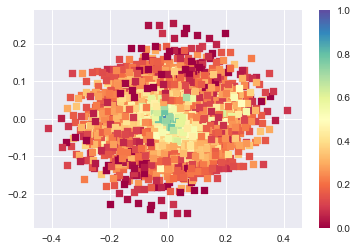

In [91]:
#neww_locations = locations.set_index("station_id",drop=True)
#temp = nnon_zero.reset_index()
#print(temp)
#all_stations = temp["station_id"].values
for station1 in all_stations:
    new_locations = locations.set_index("station_id",drop=True)
    new_locations["longitude"] = new_locations["longitude"]-new_locations.loc[station1,"longitude"]
    new_locations["latitude"] = new_locations["latitude"]-new_locations.loc[station1,"latitude"]
    for station2 in all_stations:
        if station2 != station1:
            x=new_locations.loc[station2,"longitude"]
            y=new_locations.loc[station2,"latitude"]
            z=correlations.loc[station1,station2]
            plt.scatter(x,y,c=z,vmin=0, vmax=1, marker="s",cmap="Spectral")
plt.colorbar()
plt.show()

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


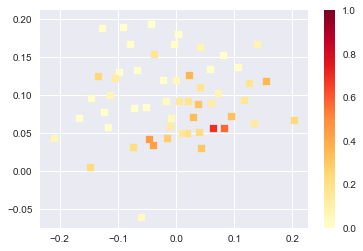

In [41]:
new_locations = locations.set_index("station_id",drop=True)
new_locations["longitude"] = new_locations["longitude"]-new_locations.loc["S60","longitude"]
new_locations["latitude"] = new_locations["latitude"]-new_locations.loc["S60","latitude"]
for station2 in nnon_zero["station_id"].unique():
    if station2 != "S60":
        x=new_locations.loc[station2,"longitude"]
        y=new_locations.loc[station2,"latitude"]
        z=correlations.loc["S60",station2]
        plt.scatter(x,y,c=z,vmin=0,vmax=1,marker="s",cmap="YlOrRd")
        #plt.show()
        print("ok")
plt.colorbar()
plt.show()

In [57]:
indices = list(nnon_zero.index.unique())
indices

[(2016, 12, 3, 1),
 (2016, 12, 3, 2),
 (2016, 12, 3, 4),
 (2016, 12, 3, 5),
 (2016, 12, 3, 6),
 (2016, 12, 3, 7),
 (2016, 12, 4, 3),
 (2016, 12, 4, 21),
 (2016, 12, 4, 22),
 (2016, 12, 4, 23),
 (2016, 12, 5, 5),
 (2016, 12, 5, 6),
 (2016, 12, 5, 21),
 (2016, 12, 5, 22),
 (2016, 12, 5, 23),
 (2016, 12, 6, 0),
 (2016, 12, 6, 1),
 (2016, 12, 6, 2),
 (2016, 12, 6, 3),
 (2016, 12, 6, 4),
 (2016, 12, 6, 6),
 (2016, 12, 6, 9),
 (2016, 12, 6, 14),
 (2016, 12, 6, 16),
 (2016, 12, 6, 17),
 (2016, 12, 6, 18),
 (2016, 12, 7, 9),
 (2016, 12, 7, 16),
 (2016, 12, 7, 17),
 (2016, 12, 7, 18),
 (2016, 12, 8, 13),
 (2016, 12, 8, 14),
 (2016, 12, 8, 23),
 (2016, 12, 9, 0),
 (2016, 12, 9, 1),
 (2016, 12, 9, 4),
 (2016, 12, 9, 5),
 (2016, 12, 9, 6),
 (2016, 12, 9, 10),
 (2016, 12, 9, 14),
 (2016, 12, 9, 15),
 (2016, 12, 9, 16),
 (2016, 12, 9, 17),
 (2016, 12, 10, 1),
 (2016, 12, 10, 4),
 (2016, 12, 10, 5),
 (2016, 12, 10, 6),
 (2016, 12, 11, 0),
 (2016, 12, 11, 1),
 (2016, 12, 11, 2),
 (2016, 12, 11, 3),
 (

In [71]:
index = (2016,12,18,6)
lst = list(index)
lst[3] = lst[3]+1
index = tuple(lst)
index

(2016, 12, 18, 7)

In [72]:
index = (2016,12,18,23)
lst = list(index)
lst[3] = lst[3]-23
lst[2]=lst[2]+1
index = tuple(lst)
index

(2016, 12, 19, 0)

In [77]:
index = (2016,11,30,23)
lst = list(index)
lst[3] = lst[3]-23
lst[2]=lst[2]-29
lst[1]=lst[1]+1
index = tuple(lst)
index

(2016, 12, 1, 0)

In [76]:
index = (2016,12,31,23)
lst = list(index)
lst[3] = lst[3]-23
lst[2]=lst[2]-30
lst[1]=lst[1]-11
lst[0]=lst[0]+1
index = tuple(lst)
index

(2017, 1, 1, 0)

In [78]:
print(nnon_zero.loc[(2016,12,30,17)])

                    station_id  rainfall
year month day hour                     
2016 12    30  17          S07       0.6
               17          S08       0.2
               17         S100       0.2
               17         S101       0.2
               17         S102       5.6
               17         S104       0.6
               17         S106       0.2
               17         S107       0.4
               17         S108       0.6
               17         S114       0.4
               17         S117       5.4
               17         S118       1.0
               17         S119       0.8
               17         S120       1.2
               17         S121       0.2
               17         S123       0.6
               17          S24       0.2
               17          S35       0.6
               17          S40       1.6
               17          S46       1.6
               17          S64       1.2
               17          S69       1.6
               1

In [88]:
index1=(2017,2,28,23)
if index1 == (2017,2,28,23):
    lst = list(index1)
    lst[3] = lst[3]-23
    lst[2]=lst[2]-27
    lst[1]=lst[1]+1
    index2 = tuple(lst)
else:
    lst = list(index1)
    lst[3]=lst[3]+1
    index2 = tuple(lst)
        if index2 in indices:
            
        else:
            lst = list(index1)
            lst[3] = lst[3]-23
            lst[2]=lst[2]+1
            index2=tuple(lst)

(2017, 3, 1, 0)

In [89]:
len(indices)

965

In [90]:
index1=(2017,2,28,23)
if index1 == (2017,2,28,23):
    index2 = (2017, 3, 1, 0)
index2
nnon_zero.loc[index2]

station_id  rainfall
year month day hour                     
2017 3     1   0          S100       1.2
               0          S101       0.2
               0          S102       1.2
               0          S108       1.2
               0           S11       0.2
               0          S115       0.4
               0          S117       0.2
               0          S118       4.4
               0          S119       8.4
               0          S123       0.2
               0           S33       0.2
               0           S44      13.6
               0           S60       0.4
               0           S77       0.4
               0           S78       1.0
               0           S79       2.2
               0           S90       0.2